<a href="https://colab.research.google.com/github/CodeHunterOfficial/Data-Mining/blob/main/02.LinearModels.Classification/Lecture_2_1_Classification_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На предыдущем занятии был изучен алгоритм линейной регрессии. Возникает вопрос: как можно получить алгоритм классификации из алгоритма регрессии? Для этого предлагается следующий подход. Предположим, имеется одномерный набор данных на входе. Этот набор можно разделить на интервалы и присвоить классы элементам выборки в зависимости от интервала, к которому они относятся. Например, если элемент принадлежит к классу 1, мы можем предсказывать значение в интервале от 0 до 1, для класса 2 - от 1 до 2 и так далее. Однако такой подход может столкнуться с определенными проблемами, поскольку регрессия редко допускает ошибки при смешении классов. Поэтому важно сохранить структуру ошибок для эффективной классификации. Сохранение этой логики и структуры ошибок является ключевым аспектом при разработке алгоритма классификации. Возможно, стоит рассмотреть альтернативные подходы для решения данной задачи.

Предположим, что мы обучаем $k$ линейных регрессий, где каждая из них отвечает за уверенность в принадлежности к определенному классу. Например, первая линейная регрессия может оценивать уверенность в принадлежности к классу 1, вторая - к классу 2 и так далее до $k$-го класса.

Таким образом, каждая регрессия представляет собой "карту" уверенности классификации. Может возникнуть вопрос о методах обучения таких регрессий и их регулировании, однако данная тема будет рассмотрена более подробно позднее. Важно отметить, что на первый взгляд такой подход выглядит перспективным, поскольку линейные регрессии могут выдавать значения в широком диапазоне от минус бесконечности до плюс бесконечности. После определения выходов линейных регрессий, обозначим их как $Z (z_1, z_2, …, z_k)$ и продолжим анализ.

Таким образом, путем обучения k линейных регрессий для каждого класса мы можем получить уверенности в принадлежности объектов к определенным классам. Далее, используя эти уверенности, можно принять решение о классификации объекта в соответствии с тем классом, для которого уверенность оказалась наивысшей. Этот подход позволяет эффективно преобразовать алгоритм регрессии в алгоритм классификации, сохраняя при этом структуру ошибок и логику предсказаний. Важно отметить, что такой метод требует тщательной настройки параметров и выбора оптимального числа линейных регрессий для достижения наилучших результатов в задаче классификации.

Если $Z_k > Z_i$ для любого $i \neq k$, то это означает, что объект принадлежит классу $k$: $y(\textbf{x}, \textbf{w}) = k$. Однако, следуя этому пути без дополнительных уточнений, возможно столкнуться с определенными проблемами. Рассмотрим их. Во-первых, в настоящее время отсутствует явный механизм для выражения уверенности в ответе нашего алгоритма. Желательно иметь вероятностный вектор, где все компоненты суммируются до единицы, а каждая компонента находится в диапазоне от 0 до 1, что можно интерпретировать как вектор вероятностей. Это первый аспект.

Однако существует и другой аспект. При продолжении данного подхода, независимо от настройки целевой функции, ее производная будет равна нулю во всех точках, где она определена по параметрам модели:
 $$\frac{\partial L}{\partial w} = 0$$.
 Это означает, что микроскопические изменения в обучаемых параметрах не будут влиять на значение целевой функции, что затрудняет оптимизацию такого алгоритма с использованием градиентного спуска. Целевая функция должна быть сформулирована таким образом, чтобы избежать нулевых частных производных. Решение этой проблемы представляет собой ключевой аспект в оптимизации алгоритма.

Давайте перепишем формулы для $Z_i$ как в случае линейной регрессии:

$$Z_1 = w_{10} + w_{11}x_1 + w_{12}x_2 + \ldots + w_{1M}x_M=\sum_{j=1}^{M} w_{1j}x_j + w_{10}=b_1+\vec{w}_1^T\vec{x}$$
$$Z_2 = w_{20} + w_{21}x_1 + w_{22}x_2 + \ldots + w_{2M}x_M = \sum_{j=1}^{M} w_{2j}x_j + w_{20} =b_2+\vec{w}_2^T\vec{x} $$

$$Z_3 = w_{30} + w_{31}x_1 + w_{32}x_2 + \ldots + w_{3M}x_M = \sum_{j=1}^{M} w_{3j}x_j + w_{30} =b_3+\vec{w}_3^T\vec{x} $$
$$…$$
$$Z_K = w_{K0} + w_{K1}x_1 + w_{K2}x_2 + \ldots + w_{KM}x_M = \sum_{j=1}^{M} w_{Kj}x_j + w_{K0} =b_K+\vec{w}_K^T\vec{x}$$

где $M$ - количество признаков, $w_{Kj}$ - весовой коэффициент для признака $x_j$ в классе $K$, $w_{K0}$ - смещение для класса $K$.


Из-за $\vec{w}_i^T$ создадим матрицу $W$:

$$ W =
\begin{bmatrix}
\vec{w}_1^T \\
\vec{w}_2^T \\
\vdots \\
\vec{w}_K^T
\end{bmatrix} =
\begin{bmatrix}
w_{10} & w_{11} & w_{12} & \ldots & w_{1M} \\
w_{20} & w_{21} & w_{22} & \ldots & w_{2M} \\
w_{30} & w_{31} & w_{32} & \ldots & w_{3M} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w_{K0} & w_{K1} & w_{K2} & \ldots & w_{KM}
\end{bmatrix} $$

В логистической регрессии матрица $W$ используется для хранения весовых коэффициентов модели. Векторы-строки $\vec{w}_i^T$ представляют собой веса, которые модель присваивает каждому признаку $x_i$ во входных данных. Каждая строка матрицы $W$ соответствует весам для одного из классов в задаче классификации.

При обучении логистической регрессии происходит настройка весов $W$ с помощью метода градиентного спуска или других оптимизационных алгоритмов, чтобы минимизировать ошибку модели на обучающем наборе данных и достичь лучшей классификации.

Аналогичным образом создадим вектор базисов:
$$\vec{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix}=(b_1, b_2, \cdot \cdot \cdot ,b_k)^T$$

В данном случае, вектор базисов \(b\) представляет собой вектор-столбец, содержащий базисы $b_1, b_2, \ldots, b_k$.


Построим вектор выходных значений $z:$

$$\vec{z} = \begin{bmatrix} Z_1 \\ Z_2 \\ \vdots \\ Z_k \end{bmatrix}=(Z_1, Z_2, \cdot \cdot \cdot ,Z_k)^T$$

и перепишем общее уравнение:

$$\vec{z}=W\cdot \vec{x}+\vec{b}$$

Где:
- $\vec{z}$ - вектор выходных значений,
- $W$ - матрица весов,
- $\vec{x}$ - вектор входных признаков,
- $\vec{b}$ - вектор базисов.





Наш алгоритм не способен обеспечить уверенность в ответе, поскольку он не учитывает зависимость целевой функции от класса. В данном случае частные производные по обучаемым параметрам всегда равны нулю, что делает алгоритм необучаемым с использованием градиентного спуска.

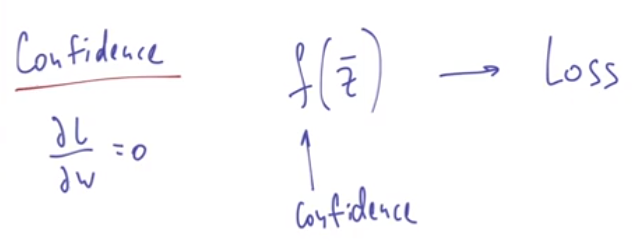

Решение проблемы заключается во введении функции $f(\vec{z})$, описывающей уверенность, которая затем передается в целевую функцию для вычисления потерь (Loss). Это позволит получить оценку уверенности для алгоритма и решить первую проблему. Для второй проблемы, при незначительном изменении обучаемых параметров, уверенность в классе может измениться, что требует зависимости целевой функции от уверенности, а не только от предсказываемого класса. Необходимо разработать функцию $f(\vec{z})$, которая описывает уверенность в предсказании на основе вектора $z$, чтобы обеспечить успешное обучение системы. Требования к этой функции должны быть тщательно продуманы для ее эффективного использования в данном контексте.

Обратим внимание, что данная функция представляет собой векторную функцию, возвращающую вектор, а не скалярное значение. Этот вектор фактически будет категориальным, представляя уверенность в ответе для каждого класса, точнее вероятность принадлежности объекта к каждому из классов из общего числа классов.

Первое требование заключается в том, что компоненты этой функции должны быть интерпретируемы как уверенности или вероятности принадлежности. Следовательно, все компоненты должны быть неотрицательными. Второе требование состоит в том, чтобы сумма всех компонент не равнялась единице.

Третье требование связано с тем, что если $z_i$ больше, чем $z_j$ (точнее, если $z_i$ больше, чем все остальные компоненты вектора $z$, то вероятно это класс $i$. Мы желаем, чтобы при этом $f_i$ было больше, чем $f_j$, что означает, что наш алгоритм предсказывает класс $i$.

Четвертое требование касается частных производных $f_i$ по параметрам. Суть заключается в том, что градиент не должен быть нулевым вектором.


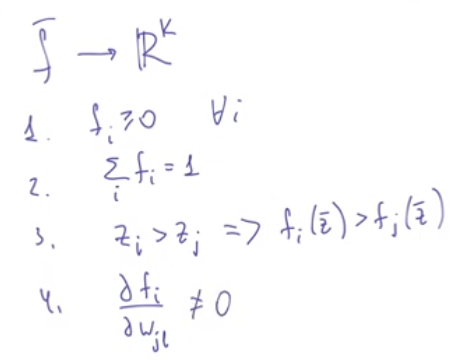


Таким образом, первые три свойства решают проблемы с уверенностями, а четвертое свойство решает проблему с градиентом. Найдем функцию, удовлетворяющую этим требованиям. Решение этой задачи заключается в использовании функции Softmax. Эта функция широко применяется в нейронных сетях для задач классификации.

В нашем распоряжении имеется входной вектор $z$ и функция Softmax, которая также представляет собой вектор, где каждая компонента является экспонентой в степени соответствующего элемента вектора $z$, деленной на сумму экспонент всех элементов вектора $z$.

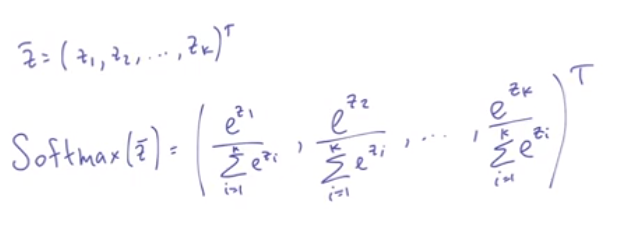

Давайте убедимся, что функция удовлетворяет всем требованиям, которые нас интересуют. Первое требование заключается в том, что все компоненты этой функции должны быть неотрицательными.

Рассмотрим компоненты функции, представленные экспонентами вещественных степеней. Экспонента вещественного числа всегда неотрицательна. Следовательно, знаменатель также неотрицателен, поскольку является суммой экспонент вещественных степеней. Числитель также неотрицателен, так как представляет собой экспоненту вещественной степени. Таким образом, первое требование выполнено: все компоненты неотрицательны.

Второе требование состоит в том, чтобы сумма компонент равнялась единице. Если просуммировать все компоненты, знаменатель останется неизменным, а числитель будет представлять собой сумму экспонент вещественных степеней. Поскольку знаменатель остается прежним, а числитель представляет собой сумму экспонент, то сумма всех компонент даст единицу. Таким образом, второе требование также выполняется.

Третье требование - если $z_i > z_j$, то $f_i > f_j$. Для компонент Softmax функции это означает, что если $z_i$ больше, чем все остальные $z_j$, то $f_i$ должно быть больше, чем все остальные $f_j$ (Смотрите график экспонента). Рассмотрим экспоненту в степени $z_i$ деленную на сумму экспонент. Если $z_i$ больше, чем $z_j$, то соответствующий числитель будет больше. Поэтому компонента функции будет больше, чем другие компоненты. Следовательно, третье требование также выполняется.


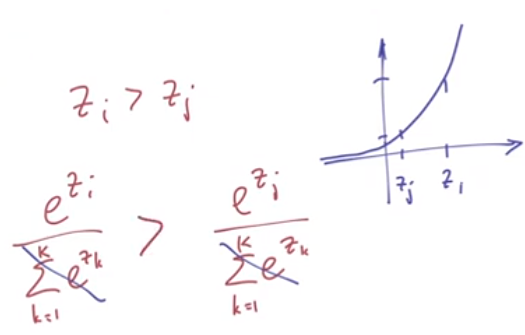

Последнее требование - частные производные любой компоненты по любому из обучаемых параметров не должны равняться нулю.

4.


$$\frac{\partial f_i}{\partial w_{kl}}=\frac{\partial (\frac{e^{z_i}}{\sum_{j=1}^{M}e^{z_j}})}{\partial w_{kl}}=\frac{\partial f_i}{\partial z_{k}} \cdot \frac{\partial z_k}{\partial w_{kl}}=\frac{\partial f_i}{\partial z_{k}} \cdot x_l$$

Чтобы производная всегда была равна нулю, необходимо, чтобы $\frac{\partial f_i}{\partial z_k}$ было равно нулю, так как $x_l$ не равно нулю.


Стоить отметить, что у нас есть два варинат:


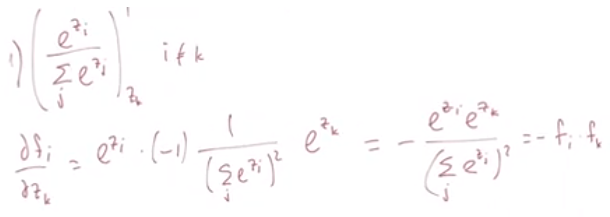

Известно, что $f_i$ и $f_k$ не равны нулю. Поэтому условие 4 выполняется в случае, когда $i \neq k$.

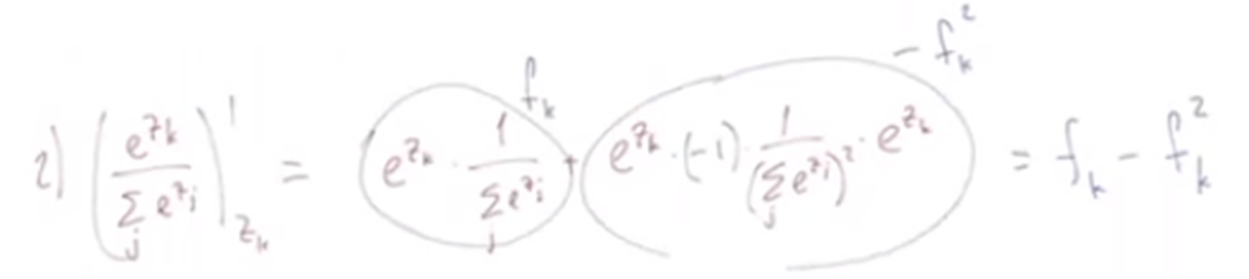

Мы воспользовались правилом $(f \cdot g)' = f' \cdot g + f \cdot g'$, где $f = e^{z_k}$ и $g = \frac{1}{\sum_{j}^{M} e^{z_j}}$.

Здесь тоже $f_k$ и  $f_k^2$ не равны нулю. Поэтому условие 4 выполняется тоже в случае, когда $i = k$.

Алгоритм логистической регрессии, который мы рассматриваем, представляет собой функцию Softmax от $W$ на $\vec{x}$, с добавлением $\vec{b}$.

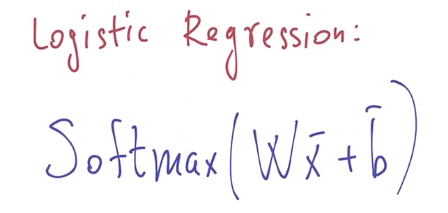

Вот у нас получиломь:

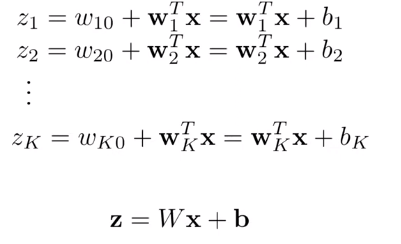

 Это представляет собой логистическую регрессию, где важным вопросом является выбор целевой функции для обучения модели. Мы сосредоточены на минимизации этой функции, что является основной целью. Теперь у нас есть уверенности, возвращаемые функцией Softmax, представляющие собой вектор с неотрицательными компонентами, сумма которых равна единице. Мы можем интерпретировать это как вектор вероятностей, по крайней мере с точки зрения принадлежности объектов к классам. Мы успешно решили проблему с частными производными, которые теперь практически всегда ненулевые.

Следовательно, мы заменили нулевые значения вектора $W$, которые не умножаются на $\vec{x}$, на значение $b$. Теперь у нас есть векторная запись.

Теперь, сформулируем задачу классификация.

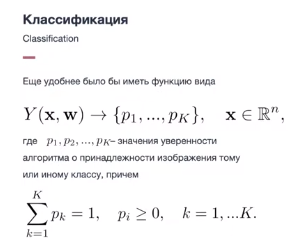

Мы стремимся к тому, чтобы наш алгоритм возвращал не только номер класса, а вектор уверенности, сумма элементов которого равна единице и все компоненты неотрицательны. Для этого мы используем функцию Softmax.

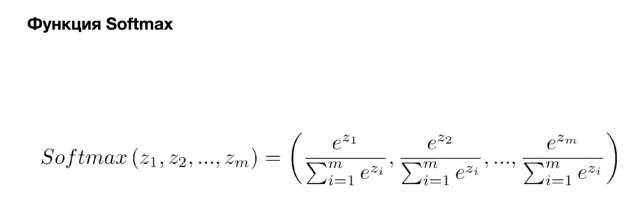

Таким образом, наш алгоритм логистической регрессии выглядит следующим образом.

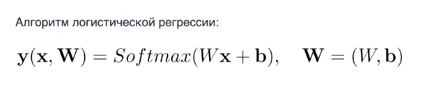

Теперь возникает вопрос: какая должна быть у этого алгоритма целевая функция?

$$E(W)=?$$

Моя основная цель состоит в том, чтобы разработать целевую функцию в соответствии с принципом максимального правдоподобия, применяя логистическую регрессию и функцию Softmax. Принцип максимального подобия предполагает создание алгоритма, который способен назначать вероятности для целевых значений. Для этого мы используем входной вектор $\vec{x}$ и стремимся определить вероятность появления метки $\vec{t}$ с учетом особенностей нашего алгоритма. Основная цель заключается в том, чтобы целевые переменные в обучающей выборке обладали вероятностной природой. Этот принцип, применяемый как в регрессии, так и в классификации, позволяет более детально изучить данную тему.


Наш алгоритм предназначен для вывода вероятностной оценки, которую мы будем использовать для интерпретации переменных $y$ и $t$. Эта оценка представляет собой компоненту функции Softmax, отражающую мнение нашего алгоритма о вероятности того, что объект $\vec{x}$ принадлежит определенному классу.

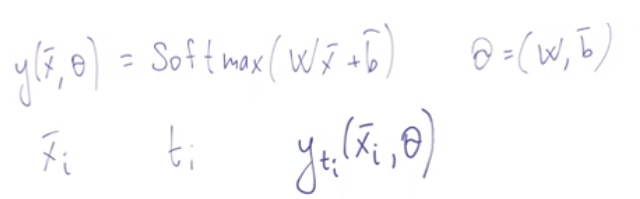

Давайте рассмотрим следующее: насколько вероятно, согласно нашему алгоритму, что для определенного входного вектора $\vec{x}_i$ мы увидим метку $\vec{t}_i$. Эта вероятность, с точки зрения нашего алгоритма, выражается как $y_{t_i}(\vec{x}_i, θ)$. Другими словами, если объект относится ко второму классу, то мы берем вторую компоненту функции Softmax и интерпретируем ее как вероятность принадлежности данному классу согласно нашему алгоритму.

Хорошо, теперь перейдем к другому вопросу. У меня возникает вопрос о большом количестве элементов, связанных с нашим алгоритмом. С какой вероятностью мы будем наблюдать значения $t_i$ в качестве целевых переменных, предполагая, что все записи являются независимыми событиями?

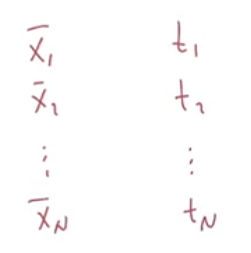

Мы можем выразить это как произведение.

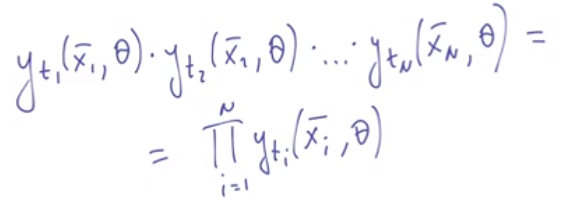


Это выражение представляет нашу функцию правдоподобия, которую мы хотим максимизировать относительно параметра $\theta$. Наша цель заключается в поиске такого значения $\theta$, при котором данное произведение будет максимальным.

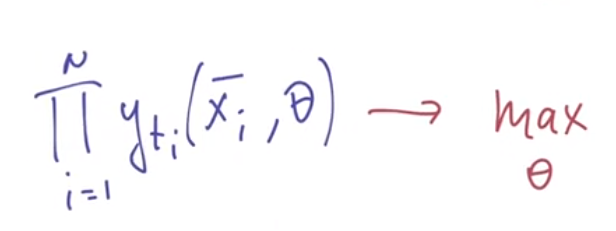

Это не самая оптимальная целевая функция, поэтому нам придется над ней поработать. Во-первых, давайте вспомним наш вектор One-Hot Encoding. Этот вектор содержит какое-то значение $t_i$ и One vector, который содержит единицу в позиции $i$. Рассмотрим это более детально: первая компонента вектора соответствует $t$, а вторая компонента соответствует One vector. Нижний индекс указывает на элемент обучающей выборки, который соответствует этому вектору, а верхний индекс указывает на номер компоненты внутри вектора. Другими словами, если у нас есть $t$ с верхним индексом равным единице, то это означает номер класса, а все остальные компоненты будут равны нулю.

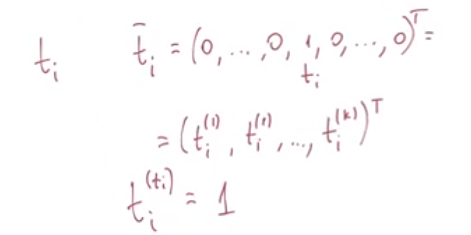

Введение такого вектора полезно, так как позволяет записать выражение иначе и делает его более удобным для использования.

Я могу записать $y_{t_i}(\vec{x}_t, θ)$ от $x$ как произведение. Теперь у нас будет компонента от единицы до K, где K - количество классов. То есть для всех классов Y с индексом $k$ в степени $t_{i}^{(k)}$.

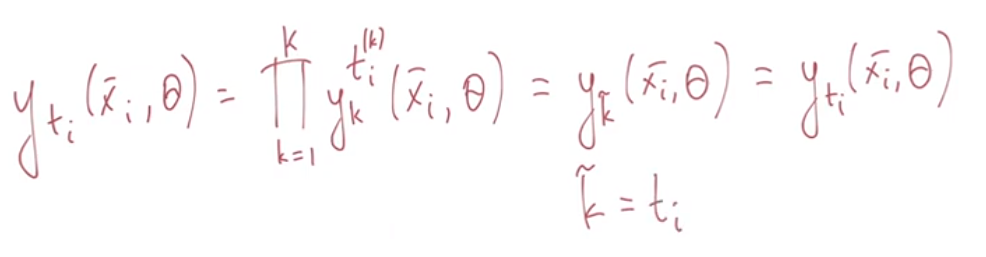

Отметим, что полученное результат и сумма является верной, т.е.


Давайте разберем, что мы здесь сделали: мы взяли произведение по всем компонентам вектора One-Hot Encoding и перемножили все выходы наших функций Softmax, возведенные в степень, соответствующую компоненту вектора One-Hot Encoding. Почему мы это делаем? Все компоненты, кроме одной, вектора One-Hot Encoding равны нулю. Следовательно, когда вы возводите $y$ в степень $0$, вы получаете единицу. Таким образом, из $k$ множителей равными единице являются все, кроме одного - того, который соответствует компоненте вектора One-Hot Encoding, где находится единица. Эта компонента соответствует правильному классу, поэтому $y$ будет равно какому-то числу $k$, которое представляет номер класса.

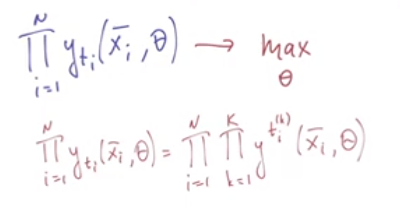

Логарифмируем (-ln) и получим:


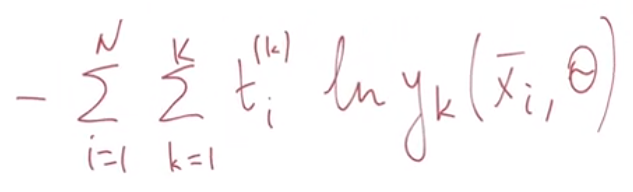

Смысл -ln заключается в том, что мы хотим перейти от максимизации к минимизации. Таким образом мы получили Cross-entripy Loss:

Cross-entropy Loss (потери перекрестной энтропии) - это функция потерь, которая используется в машинном обучении для измерения различия между двумя вероятностными распределениями. Она часто применяется в задачах классификации, где модель пытается предсказать вероятности принадлежности объектов к различным классам. Путем сравнения предсказанных вероятностей с истинными метками классов, кросс-энтропия позволяет оценить, насколько хорошо модель выполняет классификацию.

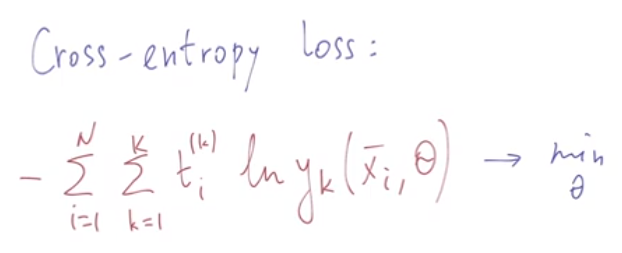

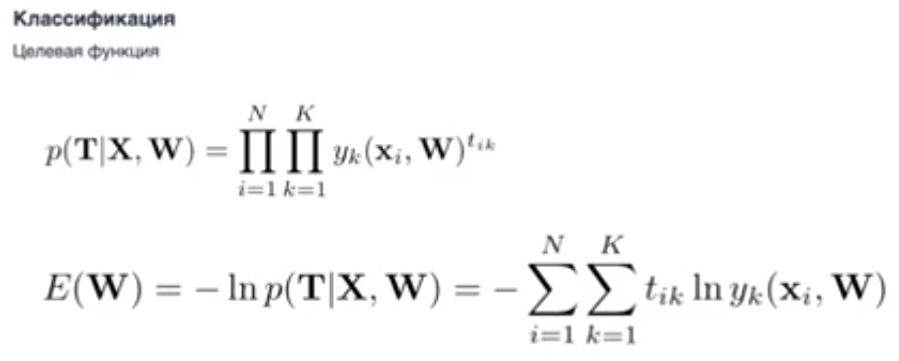

Итого получим:


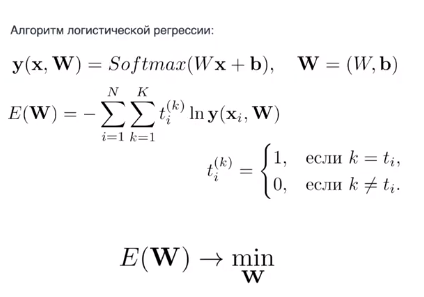

Когда мы обучаем алгоритм с использованием градиентного спуска, важно провести нормализацию данных. Это необходимо для того, чтобы каждая компонента вектора X находилась в диапазоне от минус единицы до единицы. Нормализация позволяет избежать проблем с масштабом данных, что может повлиять на эффективность оптимизации. Например, если мы измеряем рост человека в сантиметрах, а другие параметры в метрах или километрах, это может затруднить процесс обучения.

После нормализации данные выглядят более сбалансированно, что в свою очередь может улучшить процесс оптимизации. На практике это означает, что градиенты будут более стабильными и обучение модели может происходить эффективнее.

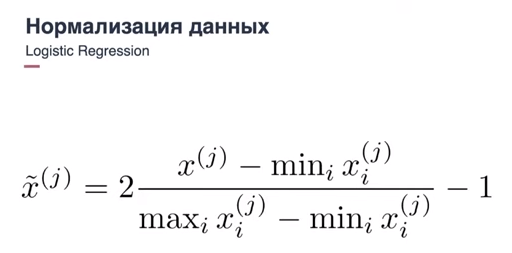

У нас имеются входные данные, представленные трехмерными векторами. Желательно, чтобы первая компонента в нашем датасете изменялась в диапазоне от минус единицы до единицы, а вторая компонента также изменялась в этом же диапазоне, аналогично и для третьей компоненты. Для достижения этой цели мы можем провести нормализацию данных.

Для начала, возьмем произвольную компоненту X и вычтем из нее минимальное значение компоненты. Затем разделим полученное значение на разницу между максимальным и минимальным значениями компоненты. Это позволит нам масштабировать значения каждой компоненты к интервалу от нуля до единицы.

После этого, если мы хотим привести значения к интервалу от минус единицы до единицы, мы можем умножить каждое значение на два и вычесть единицу. Таким образом, мы получим значения, принадлежащие заданному диапазону. Важно помнить, что при использовании базисных функций необходимо нормализовать выходы этих функций, а не сами входные данные, чтобы сохранить соответствие при последующем использовании модели.

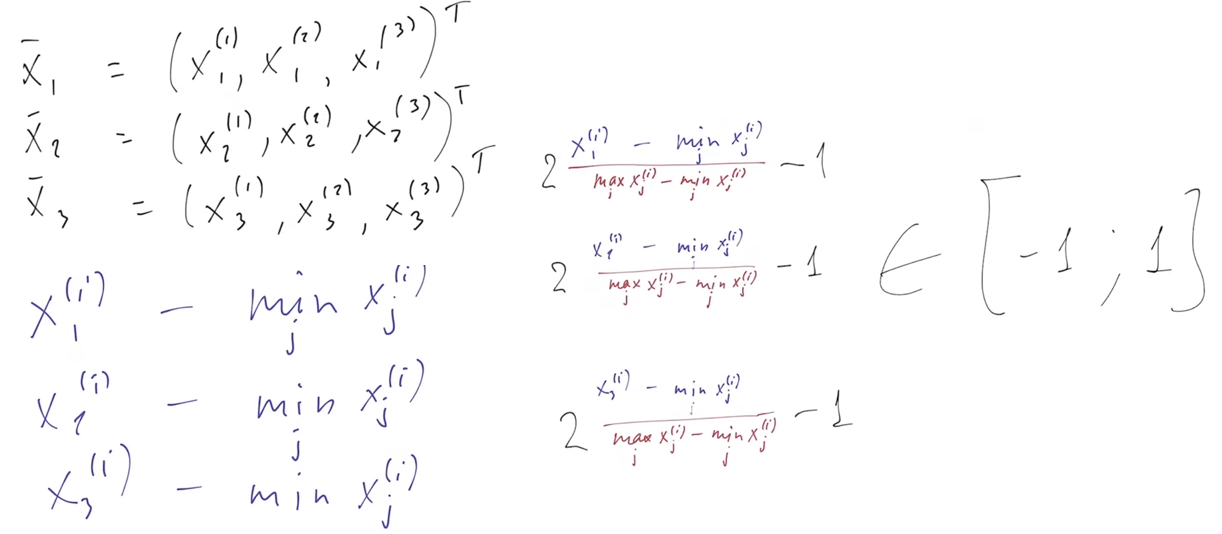

У нас есть входные данные, представленные трехмерными векторами. Для обеспечения стабильности и эффективности обучения, мы стремимся к тому, чтобы каждая компонента вектора X находилась в интервале от минус единицы до единицы. Для этой цели мы можем создать два вектора: вектор минимумов, содержащий минимальные компоненты по каждой компоненте вектора X, и вектор максимумов. Затем мы можем выполнить поэлементное деление, чтобы нормализовать данные.

Важно помнить, что при нормализации данных может возникнуть ситуация, когда значения выходят за ожидаемый диапазон. Это может произойти, если параметры нормализации были подобраны на основе обучающей выборки, и некоторые элементы тестовой выборки выходят за пределы этого диапазона. Такая ситуация может привести к снижению точности алгоритма на этих элементах.

При нормализации данных от минус единицы до единицы следует учитывать, что элементы равные нулю не будут учтены при обучении, так как их соответствующие обучаемые параметры W не будут обновляться из-за нулевой частной производной целевой функции по этим элементам. Это может быть проблемой в случае большого количества нулевых элементов. Однако, практически эти недостатки не являются критичными, и нормализация от нуля до единицы также может быть эффективной.

In [1]:
import numpy as np

# Пример исходных данных (трехмерный вектор)
X = np.array([2, 5, -3])

# Находим минимальные и максимальные значения по каждой компоненте
min_vals = np.min(X)
max_vals = np.max(X)

# Нормализация данных от минус единицы до единицы
normalized_X = (X - min_vals) / (max_vals - min_vals) * 2 - 1

print(normalized_X)

[ 0.25  1.   -1.  ]
